In [4]:
using LinearAlgebra
using Random
using Pkg
using Parameters
using Random
using StatsBase
using Plots
using LaTeXStrings
#Pkg.add("PyPlot")
#using PyPlot
#Pkg.add("JLD")
using JLD

In [5]:
include("odeLib_Langevin_double_well.jl")
include("strataLib_2.jl")


hist_TV_dist_density (generic function with 1 method)

In [6]:
#set up parameiters using Lorenz96 with time step
params=strataParams(ode=LangevinParams(h=0.01))

strataParams
  ode: LangevinParams
  innerR: Float64 1.0
  outerR: Float64 2.0
  useTicket: Bool false


In [5]:
#Create the strata for the single well
q_center_points = [1.7, 1.2, 0.7, 0.2]

Q=[1.0/0.7 0.0; 0.0 1.0/0.070]
#Q2=[1.0/1.9 0.0; 0.0 1.0/1.9]
strataList = AbstractStrata[]
ls_list = LocalSystem[]

for q in q_center_points
    p1=ODEState([0.8,q])
    p11 = deepcopy(p1)
    strata1=ellipticalStrata_Rn(p11,Q)
    registerStrata!(strataList,strata1::AbstractStrata,params::strataParams)
    ls1=LocalSystem(strata1,p1,PointDistibution,PointDistibutionWeights,params, 0.5)
    push!(ls_list, ls1)
    
    p2=ODEState([-0.8,q])
    p22 = deepcopy(p2)
    strata2=ellipticalStrata_Rn(p22,Q)
    registerStrata!(strataList,strata2::AbstractStrata,params::strataParams)
    ls2=LocalSystem(strata2,p2,PointDistibution,PointDistibutionWeights,params, 0.5)
    push!(ls_list, ls2)
    
    p3=ODEState([-0.8,-q])
    p33 = deepcopy(p3)
    strata3=ellipticalStrata_Rn(p33,Q)
    registerStrata!(strataList,strata3::AbstractStrata,params::strataParams)
    ls3=LocalSystem(strata3,p3,PointDistibution,PointDistibutionWeights,params, 0.5)
    push!(ls_list, ls3)
    
    p4=ODEState([0.8,-q])
    p44 = deepcopy(p4)
    strata4=ellipticalStrata_Rn(p44,Q)
    registerStrata!(strataList,strata4::AbstractStrata,params::strataParams)
    ls4=LocalSystem(strata4,p4,PointDistibution,PointDistibutionWeights,params, 0.5)
    push!(ls_list, ls4)
end

num_strata = 0
for ls in ls_list
    num_strata += 1
    println(num_strata)
end
J = size(strataList)[1]
println(J)
#q_center_points3

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
16


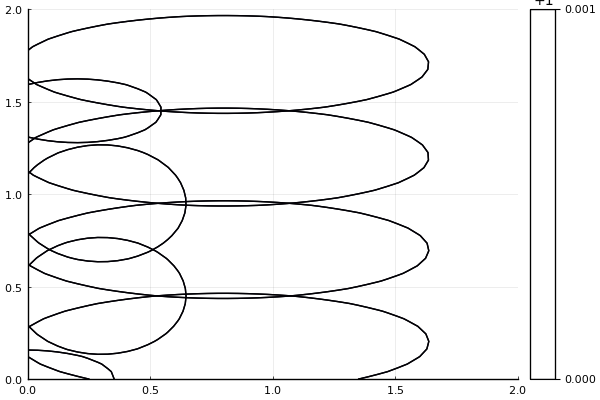

sys:1: UserWarning: The following kwargs were not used by contour: 'label'


In [6]:
pyplot()

x = 0.8
y = 0.2
a = 0.7
b = 0.07
V(p,q) = (1.0 / a) * ((p-x)^2) + (1.0/b) * (q-y)^2
p = range(0.0,2.0,length=50)
q = range(0.0,2.0,length=50)
Plots.contour(p,q, (p,q)->V(p,q), levels=[1.0,1.001])

x = 0.8
y = 0.7
a = 0.7
b = 0.07
V(p,q) = (1.0 / a) * ((p-x)^2) + (1.0/b) * (q-y)^2
p = range(0.0,2.0,length=50)
q = range(0.0,2.0,length=50)
Plots.contour!(p,q, (p,q)->V(p,q), levels=[1.0,1.001])

x = 0.3
y = 0.45
a = 0.12
b = 0.1
V(p,q) = (1.0 / a) * ((p-x)^2) + (1.0/b) * (q-y)^2
p = range(0.0,2.0,length=50)
q = range(0.0,2.0,length=50)
Plots.contour!(p,q, (p,q)->V(p,q), levels=[1.0,1.001])

x = 0.8
y = 1.2
a = 0.7
b = 0.07
V(p,q) = (1.0 / a) * ((p-x)^2) + (1.0/b) * (q-y)^2
p = range(0.0,2.0,length=50)
q = range(0.0,2.0,length=50)
Plots.contour!(p,q, (p,q)->V(p,q), levels=[1.0,1.001])

x = 0.3
y = 0.95
a = 0.12
b = 0.1
V(p,q) = (1.0 / a) * ((p-x)^2) + (1.0/b) * (q-y)^2
p = range(0.0,2.0,length=50)
q = range(0.0,2.0,length=50)
Plots.contour!(p,q, (p,q)->V(p,q), levels=[1.0,1.001])

x = 0.8
y = 1.7
a = 0.7
b = 0.07
V(p,q) = (1.0 / a) * ((p-x)^2) + (1.0/b) * (q-y)^2
p = range(0.0,2.0,length=50)
q = range(0.0,2.0,length=50)
Plots.contour!(p,q, (p,q)->V(p,q), levels=[1.0,1.001])

x = 0.2
y = 1.45
a = 0.12
b = 0.03
V(p,q) = (1.0 / a) * ((p-x)^2) + (1.0/b) * (q-y)^2
p = range(0.0,2.0,length=50)
q = range(0.0,2.0,length=50)
Plots.contour!(p,q, (p,q)->V(p,q), levels=[1.0,1.001])

x = 0.0
y = 0.0
a = 0.125
b = 0.025
V(p,q) = (1.0 / a) * ((p-x)^2) + (1.0/b) * (q-y)^2
p = range(0.0,2.0,length=50)
q = range(0.0,2.0,length=50)
Plots.contour!(p,q, (p,q)->V(p,q), levels=[1.0,1.001])

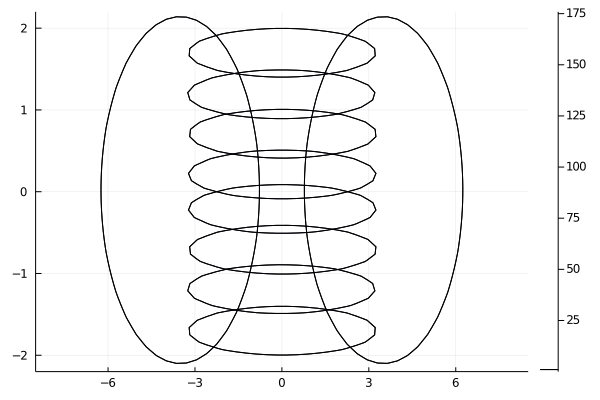

In [13]:
a = 10.5
b = 0.09
p = range(-8.5,8.5,length=50)
q = range(-2.2,2.2,length=50)

x = 0.01
y = 1.7
V(p,q) = (1.0 / a) * ((p-x)^2) + (1.0/b) * (q-y)^2
Plots.contour(p,q, (p,q)->V(p,q), levels=[1.0,1.001])

x = -0.02
y = 1.19
V(p,q) = (1.0 / a) * ((p-x)^2) + (1.0/b) * (q-y)^2
Plots.contour!(p,q, (p,q)->V(p,q), levels=[1.0,1.001])

x = 0.03
y = 0.71
V(p,q) = (1.0 / a) * ((p-x)^2) + (1.0/b) * (q-y)^2
Plots.contour!(p,q, (p,q)->V(p,q), levels=[1.0,1.001])

x = 0.01
y = 0.21
V(p,q) = (1.0 / a) * ((p-x)^2) + (1.0/b) * (q-y)^2
Plots.contour!(p,q, (p,q)->V(p,q), levels=[1.0,1.001])

x = 0.01
y = -0.21
V(p,q) = (1.0 / a) * ((p-x)^2) + (1.0/b) * (q-y)^2
Plots.contour!(p,q, (p,q)->V(p,q), levels=[1.0,1.001])

x = 0.03
y = -0.71
V(p,q) = (1.0 / a) * ((p-x)^2) + (1.0/b) * (q-y)^2
Plots.contour!(p,q, (p,q)->V(p,q), levels=[1.0,1.001])

x = -0.02
y = -1.19
V(p,q) = (1.0 / a) * ((p-x)^2) + (1.0/b) * (q-y)^2
Plots.contour!(p,q, (p,q)->V(p,q), levels=[1.0,1.001])

x = 0.01
y = -1.7
V(p,q) = (1.0 / a) * ((p-x)^2) + (1.0/b) * (q-y)^2
Plots.contour!(p,q, (p,q)->V(p,q), levels=[1.0,1.001])

x = -3.51
y = 0.02
a = 7.5
b = 4.5
V(p,q) = (1.0 / a) * ((p-x)^2) + (1.0/b) * (q-y)^2
Plots.contour!(p,q, (p,q)->V(p,q), levels=[1.0,1.001])

x = 3.51
y = 0.02
a = 7.5
b = 4.5
V(p,q) = (1.0 / a) * ((p-x)^2) + (1.0/b) * (q-y)^2
Plots.contour!(p,q, (p,q)->V(p,q), levels=[1.0,1.001])

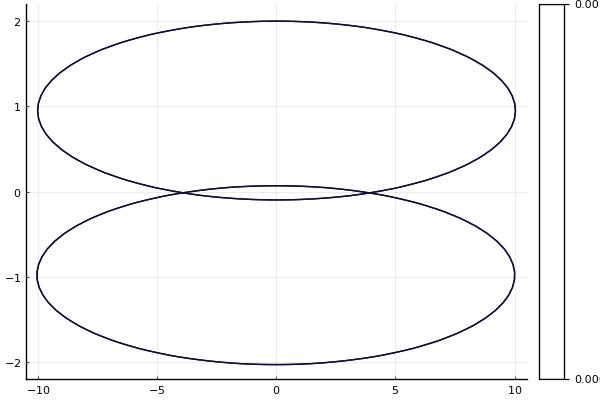

In [8]:
a = 100.5
b = 1.1
p = range(-10.5,10.5,length=50)
q = range(-2.2,2.2,length=50)

x = 0.01
y = 0.95
V(p,q) = (1.0 / a) * ((p-x)^2) + (1.0/b) * (q-y)^2
Plots.contour(p,q, (p,q)->V(p,q), levels=[1.0,1.001])

x = -0.02
y = -0.98
V(p,q) = (1.0 / a) * ((p-x)^2) + (1.0/b) * (q-y)^2
Plots.contour!(p,q, (p,q)->V(p,q), levels=[1.0,1.001])

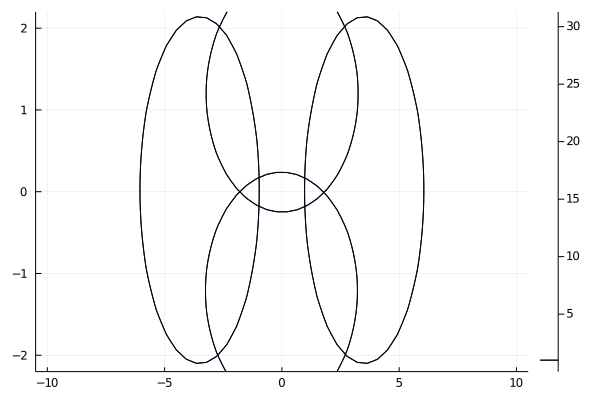

In [5]:
p = range(-10.5,10.5,length=50)
q = range(-2.2,2.2,length=50)

x = 0.01
y = 1.2
a = 10.5
b = 2.1
V(p,q) = (1.0 / a) * ((p-x)^2) + (1.0/b) * (q-y)^2
Plots.contour(p,q, (p,q)->V(p,q), levels=[1.0,1.001])

x = -0.02
y = -1.21
a = 10.5
b = 2.1
V(p,q) = (1.0 / a) * ((p-x)^2) + (1.0/b) * (q-y)^2
Plots.contour!(p,q, (p,q)->V(p,q), levels=[1.0,1.001])

x = -3.51
y = 0.02
a = 6.5
b = 4.5
V(p,q) = (1.0 / a) * ((p-x)^2) + (1.0/b) * (q-y)^2
Plots.contour!(p,q, (p,q)->V(p,q), levels=[1.0,1.001])

x = 3.51
y = 0.02
a = 6.5
b = 4.5
V(p,q) = (1.0 / a) * ((p-x)^2) + (1.0/b) * (q-y)^2
Plots.contour!(p,q, (p,q)->V(p,q), levels=[1.0,1.001])

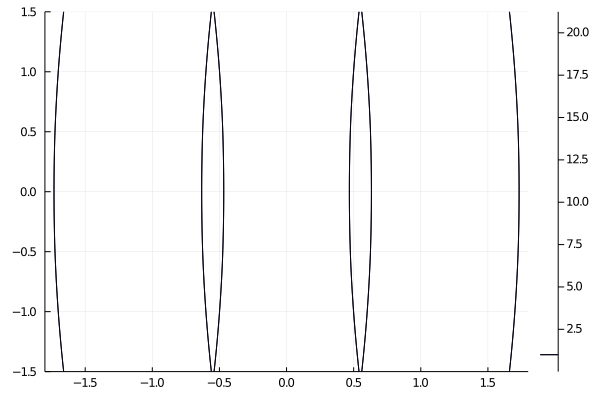

In [4]:
p = range(-1.8,1.8,length=50)
q = range(-1.5,1.5,length=50)

x = 0.0
y = 0.0
a = 0.4
b = 10.5
V(p,q) = (1.0 / a) * ((p-x)^2) + (1.0/b) * (q-y)^2
Plots.contour(p,q, (p,q)->V(p,q), levels=[1.0,1.001])

x = 1.1
y = 0.0
a = 0.4
b = 10.5
V(p,q) = (1.0 / a) * ((p-x)^2) + (1.0/b) * (q-y)^2
Plots.contour!(p,q, (p,q)->V(p,q), levels=[1.0,1.001])

x = -1.1
y = 0.0
a = 0.4
b = 10.5
V(p,q) = (1.0 / a) * ((p-x)^2) + (1.0/b) * (q-y)^2
Plots.contour!(p,q, (p,q)->V(p,q), levels=[1.0,1.001])

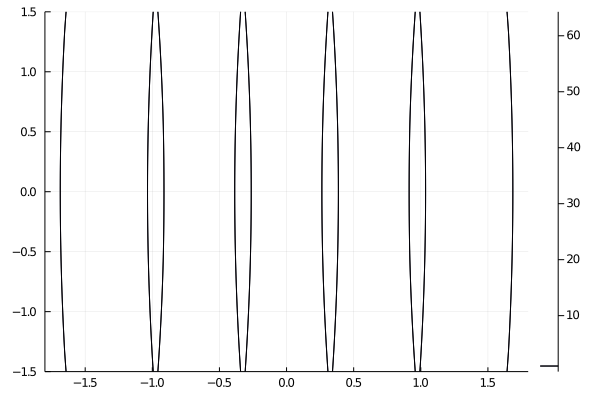

In [12]:
p = range(-1.8,1.8,length=50)
q = range(-1.5,1.5,length=50)

x = 0.0
y = 0.0
a = 0.15
b = 10.5
V(p,q) = (1.0 / a) * ((p-x)^2) + (1.0/b) * (q-y)^2
Plots.contour(p,q, (p,q)->V(p,q), levels=[1.0,1.001])

x = 0.65
y = 0.0
a = 0.15
b = 10.5
V(p,q) = (1.0 / a) * ((p-x)^2) + (1.0/b) * (q-y)^2
Plots.contour!(p,q, (p,q)->V(p,q), levels=[1.0,1.001])

x = -0.65
y = 0.0
a = 0.15
b = 10.5
V(p,q) = (1.0 / a) * ((p-x)^2) + (1.0/b) * (q-y)^2
Plots.contour!(p,q, (p,q)->V(p,q), levels=[1.0,1.001])

x = -1.3
y = 0.0
a = 0.15
b = 10.5
V(p,q) = (1.0 / a) * ((p-x)^2) + (1.0/b) * (q-y)^2
Plots.contour!(p,q, (p,q)->V(p,q), levels=[1.0,1.001])

x = 1.3
y = 0.0
a = 0.15
b = 10.5
V(p,q) = (1.0 / a) * ((p-x)^2) + (1.0/b) * (q-y)^2
Plots.contour!(p,q, (p,q)->V(p,q), levels=[1.0,1.001])

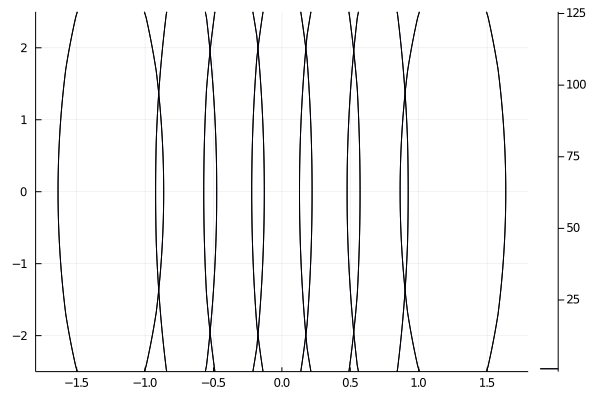

In [40]:
p = range(-1.8,1.8,length=50)
q = range(-2.5,2.5,length=50)

x = 0.0
y = 0.0
a = 0.05
b = 10.5
V(p,q) = (1.0 / a) * ((p-x)^2) + (1.0/b) * (q-y)^2
Plots.contour(p,q, (p,q)->V(p,q), levels=[1.0,1.001])

x = 0.35
y = 0.0
a = 0.05
b = 10.5
V(p,q) = (1.0 / a) * ((p-x)^2) + (1.0/b) * (q-y)^2
Plots.contour!(p,q, (p,q)->V(p,q), levels=[1.0,1.001])

x = -0.35
y = 0.0
a = 0.05
b = 10.5
V(p,q) = (1.0 / a) * ((p-x)^2) + (1.0/b) * (q-y)^2
Plots.contour!(p,q, (p,q)->V(p,q), levels=[1.0,1.001])

x = 0.70
y = 0.0
a = 0.05
b = 10.5
V(p,q) = (1.0 / a) * ((p-x)^2) + (1.0/b) * (q-y)^2
Plots.contour!(p,q, (p,q)->V(p,q), levels=[1.0,1.001])

x = -0.70
y = 0.0
a = 0.05
b = 10.5
V(p,q) = (1.0 / a) * ((p-x)^2) + (1.0/b) * (q-y)^2
Plots.contour!(p,q, (p,q)->V(p,q), levels=[1.0,1.001])


x = -1.25
y = 0.0
a = 0.15
b = 10.5
V(p,q) = (1.0 / a) * ((p-x)^2) + (1.0/b) * (q-y)^2
Plots.contour!(p,q, (p,q)->V(p,q), levels=[1.0,1.001])

x = 1.25
y = 0.0
a = 0.15
b = 10.5
V(p,q) = (1.0 / a) * ((p-x)^2) + (1.0/b) * (q-y)^2
Plots.contour!(p,q, (p,q)->V(p,q), levels=[1.0,1.001])

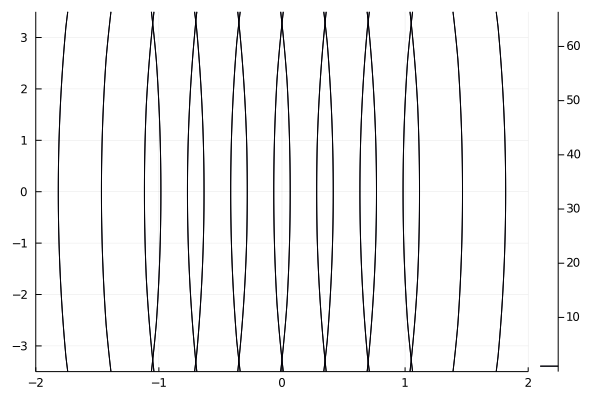

In [21]:
p = range(-2.0,2.0,length=50)
q = range(-3.5,3.5,length=50)
scale = 3.5

x = 0.0
y = 0.0
a = 0.05 * scale
b = 10.5 * scale
V(p,q) = (1.0 / a) * ((p-x)^2) + (1.0/b) * (q-y)^2
Plots.contour(p,q, (p,q)->V(p,q), levels=[1.0,1.001])

x = 0.35
y = 0.0
a = 0.05 * scale
b = 10.5 * scale
V(p,q) = (1.0 / a) * ((p-x)^2) + (1.0/b) * (q-y)^2
Plots.contour!(p,q, (p,q)->V(p,q), levels=[1.0,1.001])

x = -0.35
y = 0.0
a = 0.05 * scale
b = 10.5 * scale
V(p,q) = (1.0 / a) * ((p-x)^2) + (1.0/b) * (q-y)^2
Plots.contour!(p,q, (p,q)->V(p,q), levels=[1.0,1.001])

x = 0.70
y = 0.0
a = 0.05 * scale
b = 10.5 * scale
V(p,q) = (1.0 / a) * ((p-x)^2) + (1.0/b) * (q-y)^2
Plots.contour!(p,q, (p,q)->V(p,q), levels=[1.0,1.001])

x = -0.70
y = 0.0
a = 0.05 * scale
b = 10.5 * scale
V(p,q) = (1.0 / a) * ((p-x)^2) + (1.0/b) * (q-y)^2
Plots.contour!(p,q, (p,q)->V(p,q), levels=[1.0,1.001])


x = 1.05
y = 0.0
a = 0.05 * scale
b = 10.5 * scale
V(p,q) = (1.0 / a) * ((p-x)^2) + (1.0/b) * (q-y)^2
Plots.contour!(p,q, (p,q)->V(p,q), levels=[1.0,1.001])

x = -1.05
y = 0.0
a = 0.05 * scale
b = 10.5 * scale
V(p,q) = (1.0 / a) * ((p-x)^2) + (1.0/b) * (q-y)^2
Plots.contour!(p,q, (p,q)->V(p,q), levels=[1.0,1.001])

x = 1.4
y = 0.0
a = 0.05 * scale
b = 10.5 * scale
V(p,q) = (1.0 / a) * ((p-x)^2) + (1.0/b) * (q-y)^2
Plots.contour!(p,q, (p,q)->V(p,q), levels=[1.0,1.001])

x = -1.4
y = 0.0
a = 0.05 * scale
b = 10.5 * scale
V(p,q) = (1.0 / a) * ((p-x)^2) + (1.0/b) * (q-y)^2
Plots.contour!(p,q, (p,q)->V(p,q), levels=[1.0,1.001])

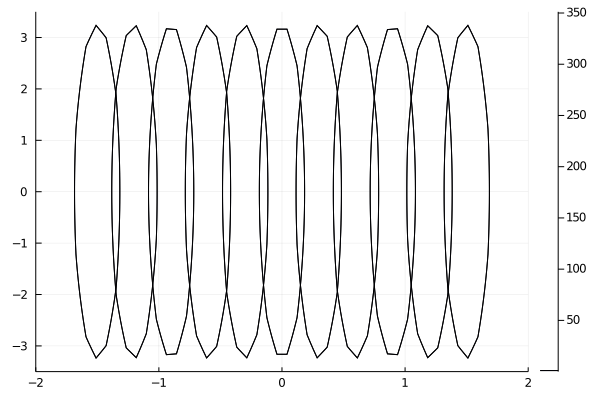

In [16]:
p = range(-2.0,2.0,length=50)
q = range(-3.5,3.5,length=50)
scale = 1.0

x = 0.0
y = 0.0
a = 0.035 * scale
b = 10.5 * scale
V(p,q) = (1.0 / a) * ((p-x)^2) + (1.0/b) * (q-y)^2
Plots.contour(p,q, (p,q)->V(p,q), levels=[1.0,1.001])

x = 0.30
y = 0.0
a = 0.035 * scale
b = 10.5 * scale
V(p,q) = (1.0 / a) * ((p-x)^2) + (1.0/b) * (q-y)^2
Plots.contour!(p,q, (p,q)->V(p,q), levels=[1.0,1.001])

x = -0.30
y = 0.0
a = 0.035 * scale
b = 10.5 * scale
V(p,q) = (1.0 / a) * ((p-x)^2) + (1.0/b) * (q-y)^2
Plots.contour!(p,q, (p,q)->V(p,q), levels=[1.0,1.001])

x = 0.60
y = 0.0
a = 0.035 * scale
b = 10.5 * scale
V(p,q) = (1.0 / a) * ((p-x)^2) + (1.0/b) * (q-y)^2
Plots.contour!(p,q, (p,q)->V(p,q), levels=[1.0,1.001])

x = -0.60
y = 0.0
a = 0.035 * scale
b = 10.5 * scale
V(p,q) = (1.0 / a) * ((p-x)^2) + (1.0/b) * (q-y)^2
Plots.contour!(p,q, (p,q)->V(p,q), levels=[1.0,1.001])


x = 0.9
y = 0.0
a = 0.035 * scale
b = 10.5 * scale
V(p,q) = (1.0 / a) * ((p-x)^2) + (1.0/b) * (q-y)^2
Plots.contour!(p,q, (p,q)->V(p,q), levels=[1.0,1.001])

x = -0.9
y = 0.0
a = 0.035 * scale
b = 10.5 * scale
V(p,q) = (1.0 / a) * ((p-x)^2) + (1.0/b) * (q-y)^2
Plots.contour!(p,q, (p,q)->V(p,q), levels=[1.0,1.001])

x = 1.2
y = 0.0
a = 0.035 * scale
b = 10.5 * scale
V(p,q) = (1.0 / a) * ((p-x)^2) + (1.0/b) * (q-y)^2
Plots.contour!(p,q, (p,q)->V(p,q), levels=[1.0,1.001])

x = -1.2
y = 0.0
a = 0.035 * scale
b = 10.5 * scale
V(p,q) = (1.0 / a) * ((p-x)^2) + (1.0/b) * (q-y)^2
Plots.contour!(p,q, (p,q)->V(p,q), levels=[1.0,1.001])

x = 1.5
y = 0.0
a = 0.035 * scale
b = 10.5 * scale
V(p,q) = (1.0 / a) * ((p-x)^2) + (1.0/b) * (q-y)^2
Plots.contour!(p,q, (p,q)->V(p,q), levels=[1.0,1.001])

x = -1.5
y = 0.0
a = 0.035 * scale
b = 10.5 * scale
V(p,q) = (1.0 / a) * ((p-x)^2) + (1.0/b) * (q-y)^2
Plots.contour!(p,q, (p,q)->V(p,q), levels=[1.0,1.001])

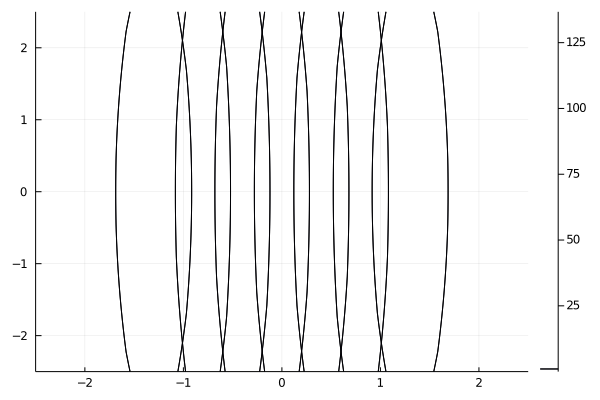

In [58]:
p = range(-2.5,2.5,length=50)
q = range(-2.5,2.5,length=50)

x = 0.0
y = 0.0
a = 0.08
b = 10.5
V(p,q) = (1.0 / a) * ((p-x)^2) + (1.0/b) * (q-y)^2
Plots.contour(p,q, (p,q)->V(p,q), levels=[1.0,1.001])

x = 0.4
y = 0.0
a = 0.08
b = 10.5
V(p,q) = (1.0 / a) * ((p-x)^2) + (1.0/b) * (q-y)^2
Plots.contour!(p,q, (p,q)->V(p,q), levels=[1.0,1.001])

x = -0.4
y = 0.0
a = 0.08
b = 10.5
V(p,q) = (1.0 / a) * ((p-x)^2) + (1.0/b) * (q-y)^2
Plots.contour!(p,q, (p,q)->V(p,q), levels=[1.0,1.001])

x = 0.8
y = 0.0
a = 0.08
b = 10.5
V(p,q) = (1.0 / a) * ((p-x)^2) + (1.0/b) * (q-y)^2
Plots.contour!(p,q, (p,q)->V(p,q), levels=[1.0,1.001])

x = -0.8
y = 0.0
a = 0.08
b = 10.5
V(p,q) = (1.0 / a) * ((p-x)^2) + (1.0/b) * (q-y)^2
Plots.contour!(p,q, (p,q)->V(p,q), levels=[1.0,1.001])


x = -1.3
y = 0.0
a = 0.15
b = 10.5
V(p,q) = (1.0 / a) * ((p-x)^2) + (1.0/b) * (q-y)^2
Plots.contour!(p,q, (p,q)->V(p,q), levels=[1.0,1.001])

x = 1.3
y = 0.0
a = 0.15
b = 10.5
V(p,q) = (1.0 / a) * ((p-x)^2) + (1.0/b) * (q-y)^2
Plots.contour!(p,q, (p,q)->V(p,q), levels=[1.0,1.001])

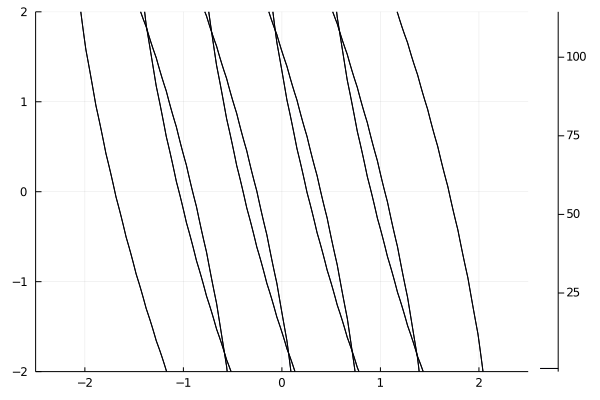

In [85]:
x = 0.0
y = 0.0
a = 1.0 / 6.35
b = 1.0 / 0.404
c = 1.0 / 1.39
V(p,q) = (1.0 / a) * ((p-x)^2) + (1.0/b) * (q-y)^2 + (2.0 / c) * (p-x)*(q-y) 
Plots.contour(p,q, (p,q)->V(p,q), levels=[1.0,1.001])

x = 0.65
y = 0.0
a = 1.0 / 6.35
b = 1.0 / 0.404
c = 1.0 / 1.39
V(p,q) = (1.0 / a) * ((p-x)^2) + (1.0/b) * (q-y)^2 + (2.0 / c) * (p-x)*(q-y) 
Plots.contour!(p,q, (p,q)->V(p,q), levels=[1.0,1.001])

x = 1.3
y = 0.0
a = 1.0 / 6.35
b = 1.0 / 0.404
c = 1.0 / 1.39
V(p,q) = (1.0 / a) * ((p-x)^2) + (1.0/b) * (q-y)^2 + (2.0 / c) * (p-x)*(q-y) 
Plots.contour!(p,q, (p,q)->V(p,q), levels=[1.0,1.001])

x = -0.65
y = 0.0
a = 1.0 / 6.35
b = 1.0 / 0.404
c = 1.0 / 1.39
V(p,q) = (1.0 / a) * ((p-x)^2) + (1.0/b) * (q-y)^2 + (2.0 / c) * (p-x)*(q-y) 
Plots.contour!(p,q, (p,q)->V(p,q), levels=[1.0,1.001])

x = -1.3
y = 0.0
a = 1.0 / 6.35
b = 1.0 / 0.404
c = 1.0 / 1.39
V(p,q) = (1.0 / a) * ((p-x)^2) + (1.0/b) * (q-y)^2 + (2.0 / c) * (p-x)*(q-y) 
Plots.contour!(p,q, (p,q)->V(p,q), levels=[1.0,1.001])

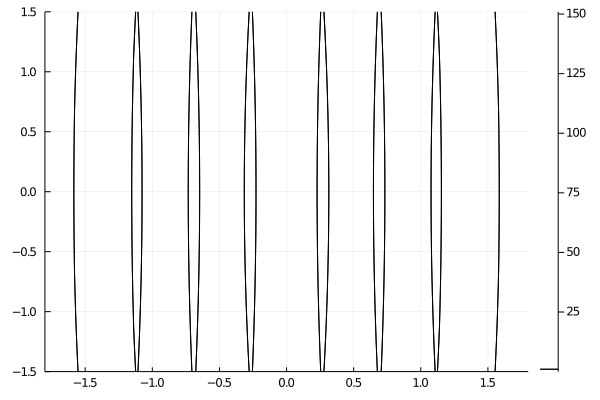

In [25]:
p = range(-1.8,1.8,length=50)
q = range(-1.5,1.5,length=50)

x = 0.0
y = 0.0
a = 0.1
b = 10.5
V(p,q) = (1.0 / a) * ((p-x)^2) + (1.0/b) * (q-y)^2
Plots.contour(p,q, (p,q)->V(p,q), levels=[1.0,1.001])

x = 0.9
y = 0.0
a = 0.065
b = 10.5
V(p,q) = (1.0 / a) * ((p-x)^2) + (1.0/b) * (q-y)^2
Plots.contour!(p,q, (p,q)->V(p,q), levels=[1.0,1.001])

x = -0.9
y = 0.0
a = 0.065
b = 10.5
V(p,q) = (1.0 / a) * ((p-x)^2) + (1.0/b) * (q-y)^2
Plots.contour!(p,q, (p,q)->V(p,q), levels=[1.0,1.001])

x = -1.33
y = 0.0
a = 0.065
b = 10.5
V(p,q) = (1.0 / a) * ((p-x)^2) + (1.0/b) * (q-y)^2
Plots.contour!(p,q, (p,q)->V(p,q), levels=[1.0,1.001])

x = 1.33
y = 0.0
a = 0.065
b = 10.5
V(p,q) = (1.0 / a) * ((p-x)^2) + (1.0/b) * (q-y)^2
Plots.contour!(p,q, (p,q)->V(p,q), levels=[1.0,1.001])

x = 0.48
y = 0.0
a = 0.065
b = 10.5
V(p,q) = (1.0 / a) * ((p-x)^2) + (1.0/b) * (q-y)^2
Plots.contour!(p,q, (p,q)->V(p,q), levels=[1.0,1.001])

x = -0.48
y = 0.0
a = 0.065
b = 10.5
V(p,q) = (1.0 / a) * ((p-x)^2) + (1.0/b) * (q-y)^2
Plots.contour!(p,q, (p,q)->V(p,q), levels=[1.0,1.001])

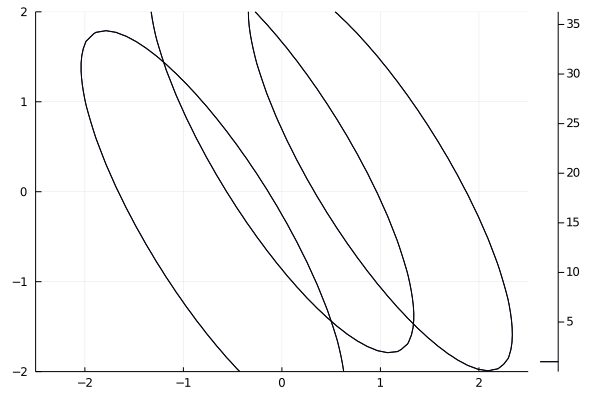

In [12]:
p = range(-2.5,2.5,length=50)
q = range(-2.0,2.0,length=50)

x = -0.0
y = 0.4
a = 0.6
b = 1.6
c = 1.2
V(p,q) = (1.0 / a) * ((p-x)^2) + (1.0/b) * (q-y)^2 + (2.0 / c) * (p-x)*(q-y) 
Plots.contour(p,q, (p,q)->V(p,q), levels=[1.0,1.001])

x = -0.7
y = -0.4
a = 0.6
b = 1.6
c = 1.2
V(p,q) = (1.0 / a) * ((p-x)^2) + (1.0/b) * (q-y)^2 + (2.0 / c) * (p-x)*(q-y) 
Plots.contour!(p,q, (p,q)->V(p,q), levels=[1.0,1.001])

x = 1.0
y = 0.2
a = 0.6
b = 1.6
c = 1.2
V(p,q) = (1.0 / a) * ((p-x)^2) + (1.0/b) * (q-y)^2 + (2.0 / c) * (p-x)*(q-y) 
Plots.contour!(p,q, (p,q)->V(p,q), levels=[1.0,1.001])

#x = 1.5
#y = 1.3
#a = 0.6
#b = 1.6
#c = 1.2
#V(p,q) = (1.0 / a) * ((p-x)^2) + (1.0/b) * (q-y)^2 + (2.0 / c) * (p-x)*(q-y) 
#Plots.contour!(p,q, (p,q)->V(p,q), levels=[1.0,1.001])

#x = -1.6
#y = -1.5
#a = 0.6
#b = 1.6
#c = 1.2
#V(p,q) = (1.0 / a) * ((p-x)^2) + (1.0/b) * (q-y)^2 + (2.0 / c) * (p-x)*(q-y) 
#Plots.contour!(p,q, (p,q)->V(p,q), levels=[1.0,1.001])

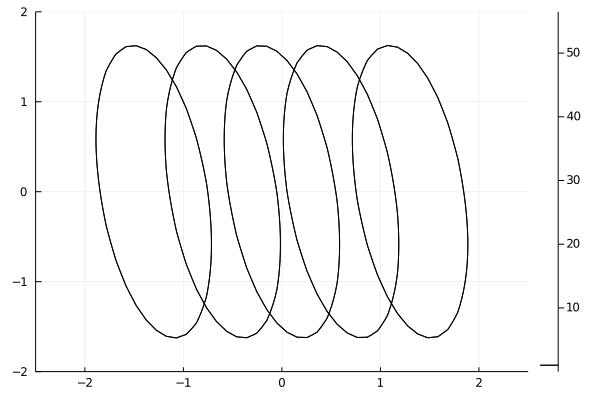

In [49]:
p = range(-2.5,2.5,length=50)
q = range(-2.0,2.0,length=50)

x = 0.0
y = 0.0
a = 0.3
b = 2.3
c = 2.3
V(p,q) = (1.0 / a) * ((p-x)^2) + (1.0/b) * (q-y)^2 + (2.0 / c) * (p-x)*(q-y) 
Plots.contour(p,q, (p,q)->V(p,q), levels=[1.0,1.001])

x = 0.6
y = 0.0
a = 0.3
b = 2.3
c = 2.3
V(p,q) = (1.0 / a) * ((p-x)^2) + (1.0/b) * (q-y)^2 + (2.0 / c) * (p-x)*(q-y) 
Plots.contour!(p,q, (p,q)->V(p,q), levels=[1.0,1.001])

x = 1.3
y = 0.0
a = 0.3
b = 2.3
c = 2.3
V(p,q) = (1.0 / a) * ((p-x)^2) + (1.0/b) * (q-y)^2 + (2.0 / c) * (p-x)*(q-y) 
Plots.contour!(p,q, (p,q)->V(p,q), levels=[1.0,1.001])

x = -0.6
y = 0.0
a = 0.3
b = 2.3
c = 2.3
V(p,q) = (1.0 / a) * ((p-x)^2) + (1.0/b) * (q-y)^2 + (2.0 / c) * (p-x)*(q-y) 
Plots.contour!(p,q, (p,q)->V(p,q), levels=[1.0,1.001])

x = -1.3
y = 0.0
a = 0.3
b = 2.3
c = 2.3
V(p,q) = (1.0 / a) * ((p-x)^2) + (1.0/b) * (q-y)^2 + (2.0 / c) * (p-x)*(q-y) 
Plots.contour!(p,q, (p,q)->V(p,q), levels=[1.0,1.001])

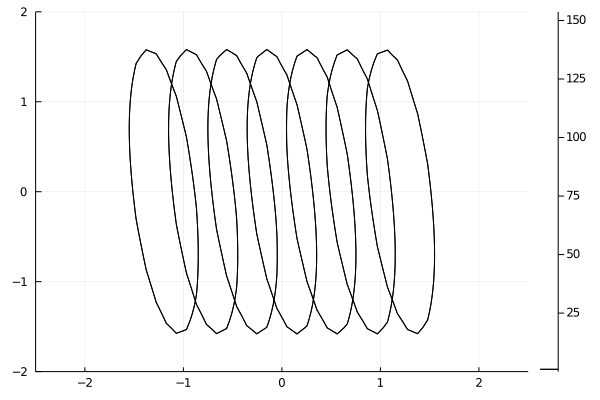

In [72]:
p = range(-2.5,2.5,length=50)
q = range(-2.0,2.0,length=50)

x = 0.0
y = 0.0
a = 0.1
b = 2.0
c = 1.0
V(p,q) = (1.0 / a) * ((p-x)^2) + (1.0/b) * (q-y)^2 + (2.0 / c) * (p-x)*(q-y) 
Plots.contour(p,q, (p,q)->V(p,q), levels=[1.0,1.001])

x = 0.4
y = 0.0
a = 0.1
b = 2.0
c = 1.0
V(p,q) = (1.0 / a) * ((p-x)^2) + (1.0/b) * (q-y)^2 + (2.0 / c) * (p-x)*(q-y) 
Plots.contour!(p,q, (p,q)->V(p,q), levels=[1.0,1.001])

x = 0.8
y = 0.0
a = 0.1
b = 2.0
c = 1.0
V(p,q) = (1.0 / a) * ((p-x)^2) + (1.0/b) * (q-y)^2 + (2.0 / c) * (p-x)*(q-y) 
Plots.contour!(p,q, (p,q)->V(p,q), levels=[1.0,1.001])

x = 1.2
y = 0.0
a = 0.1
b = 2.0
c = 1.0
V(p,q) = (1.0 / a) * ((p-x)^2) + (1.0/b) * (q-y)^2 + (2.0 / c) * (p-x)*(q-y) 
Plots.contour!(p,q, (p,q)->V(p,q), levels=[1.0,1.001])

x = -0.4
y = 0.0
a = 0.1
b = 2.0
c = 1.0
V(p,q) = (1.0 / a) * ((p-x)^2) + (1.0/b) * (q-y)^2 + (2.0 / c) * (p-x)*(q-y) 
Plots.contour!(p,q, (p,q)->V(p,q), levels=[1.0,1.001])

x = -0.8
y = 0.0
a = 0.1
b = 2.0
c = 1.0
V(p,q) = (1.0 / a) * ((p-x)^2) + (1.0/b) * (q-y)^2 + (2.0 / c) * (p-x)*(q-y) 
Plots.contour!(p,q, (p,q)->V(p,q), levels=[1.0,1.001])

x = -1.2
y = 0.0
a = 0.1
b = 2.0
c = 1.0
V(p,q) = (1.0 / a) * ((p-x)^2) + (1.0/b) * (q-y)^2 + (2.0 / c) * (p-x)*(q-y) 
Plots.contour!(p,q, (p,q)->V(p,q), levels=[1.0,1.001])

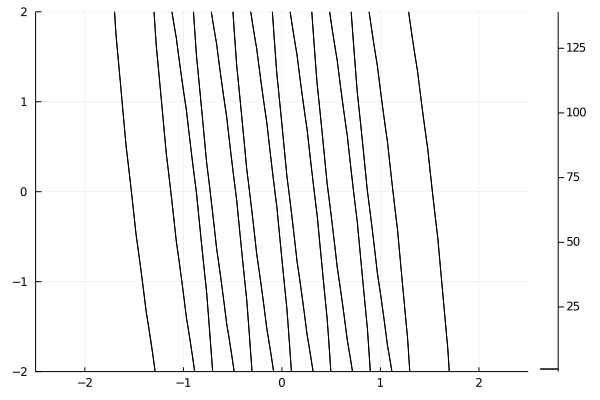

In [82]:
p = range(-2.5,2.5,length=50)
q = range(-2.0,2.0,length=50)

x = 0.0
y = 0.0
a = 1.0 / 9.1
b = 1.0 / 0.15
c = 1.0 / 0.94
V(p,q) = (1.0 / a) * ((p-x)^2) + (1.0/b) * (q-y)^2 + (2.0 / c) * (p-x)*(q-y) 
Plots.contour(p,q, (p,q)->V(p,q), levels=[1.0,1.001])

x = 0.4
y = 0.0
a = 1.0 / 9.1
b = 1.0 / 0.15
c = 1.0 / 0.94
V(p,q) = (1.0 / a) * ((p-x)^2) + (1.0/b) * (q-y)^2 + (2.0 / c) * (p-x)*(q-y) 
Plots.contour!(p,q, (p,q)->V(p,q), levels=[1.0,1.001])

x = 0.8
y = 0.0
a = 1.0 / 9.1
b = 1.0 / 0.15
c = 1.0 / 0.94
V(p,q) = (1.0 / a) * ((p-x)^2) + (1.0/b) * (q-y)^2 + (2.0 / c) * (p-x)*(q-y) 
Plots.contour!(p,q, (p,q)->V(p,q), levels=[1.0,1.001])

x = 1.2
y = 0.0
a = 1.0 / 9.1
b = 1.0 / 0.15
c = 1.0 / 0.94
V(p,q) = (1.0 / a) * ((p-x)^2) + (1.0/b) * (q-y)^2 + (2.0 / c) * (p-x)*(q-y) 
Plots.contour!(p,q, (p,q)->V(p,q), levels=[1.0,1.001])

x = -0.4
y = 0.0
a = 1.0 / 9.1
b = 1.0 / 0.15
c = 1.0 / 0.94
V(p,q) = (1.0 / a) * ((p-x)^2) + (1.0/b) * (q-y)^2 + (2.0 / c) * (p-x)*(q-y) 
Plots.contour!(p,q, (p,q)->V(p,q), levels=[1.0,1.001])

x = -0.8
y = 0.0
a = 1.0 / 9.1
b = 1.0 / 0.15
c = 1.0 / 0.94
V(p,q) = (1.0 / a) * ((p-x)^2) + (1.0/b) * (q-y)^2 + (2.0 / c) * (p-x)*(q-y) 
Plots.contour!(p,q, (p,q)->V(p,q), levels=[1.0,1.001])

x = -1.2
y = 0.0
a = 1.0 / 9.1
b = 1.0 / 0.15
c = 1.0 / 0.94
V(p,q) = (1.0 / a) * ((p-x)^2) + (1.0/b) * (q-y)^2 + (2.0 / c) * (p-x)*(q-y) 
Plots.contour!(p,q, (p,q)->V(p,q), levels=[1.0,1.001])

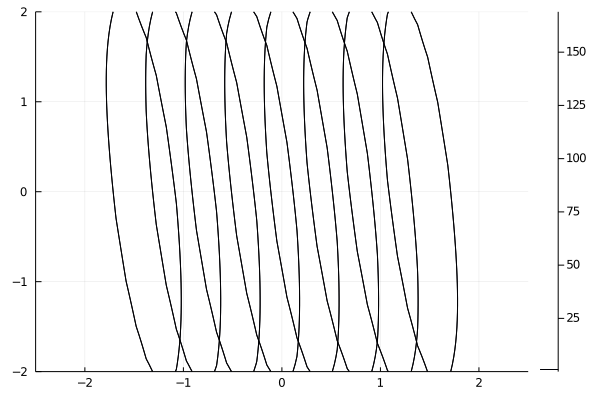

In [55]:
p = range(-2.5,2.5,length=50)
q = range(-2.0,2.0,length=50)

x = 0.2
y = 0.0
a = 0.1
b = 3.2
c = 1.0
V(p,q) = (1.0 / a) * ((p-x)^2) + (1.0/b) * (q-y)^2 + (2.0 / c) * (p-x)*(q-y) 
Plots.contour(p,q, (p,q)->V(p,q), levels=[1.0,1.001])

x = -0.2
y = 0.0
a = 0.1
b = 3.2
c = 1.0
V(p,q) = (1.0 / a) * ((p-x)^2) + (1.0/b) * (q-y)^2 + (2.0 / c) * (p-x)*(q-y) 
Plots.contour!(p,q, (p,q)->V(p,q), levels=[1.0,1.001])

x = -0.6
y = 0.0
a = 0.1
b = 3.2
c = 1.0
V(p,q) = (1.0 / a) * ((p-x)^2) + (1.0/b) * (q-y)^2 + (2.0 / c) * (p-x)*(q-y) 
Plots.contour!(p,q, (p,q)->V(p,q), levels=[1.0,1.001])

x = -1.0
y = 0.0
a = 0.1
b = 3.2
c = 1.0
V(p,q) = (1.0 / a) * ((p-x)^2) + (1.0/b) * (q-y)^2 + (2.0 / c) * (p-x)*(q-y) 
Plots.contour!(p,q, (p,q)->V(p,q), levels=[1.0,1.001])

x = 0.6
y = 0.0
a = 0.1
b = 3.2
c = 1.0
V(p,q) = (1.0 / a) * ((p-x)^2) + (1.0/b) * (q-y)^2 + (2.0 / c) * (p-x)*(q-y) 
Plots.contour!(p,q, (p,q)->V(p,q), levels=[1.0,1.001])

x = 1.0
y = 0.0
a = 0.1
b = 3.2
c = 1.0
V(p,q) = (1.0 / a) * ((p-x)^2) + (1.0/b) * (q-y)^2 + (2.0 / c) * (p-x)*(q-y) 
Plots.contour!(p,q, (p,q)->V(p,q), levels=[1.0,1.001])

x = 1.4
y = 0.0
a = 0.1
b = 3.2
c = 1.0
V(p,q) = (1.0 / a) * ((p-x)^2) + (1.0/b) * (q-y)^2 + (2.0 / c) * (p-x)*(q-y) 
Plots.contour!(p,q, (p,q)->V(p,q), levels=[1.0,1.001])

x = -1.4
y = 0.0
a = 0.1
b = 3.2
c = 1.0
V(p,q) = (1.0 / a) * ((p-x)^2) + (1.0/b) * (q-y)^2 + (2.0 / c) * (p-x)*(q-y) 
Plots.contour!(p,q, (p,q)->V(p,q), levels=[1.0,1.001])

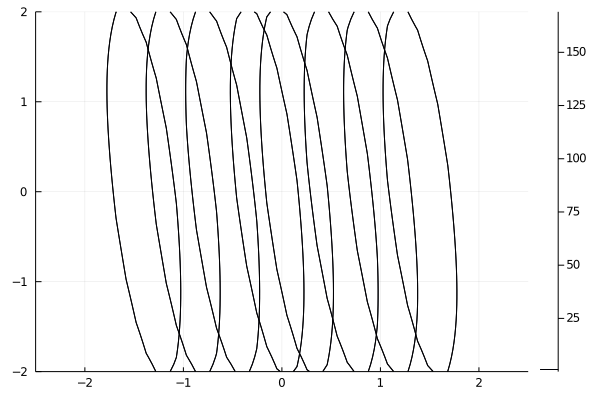

In [42]:
p = range(-2.5,2.5,length=50)
q = range(-2.0,2.0,length=50)

x = 0.15
y = 0.0
a = 0.1
b = 3.0
c = 1.0
V(p,q) = (1.0 / a) * ((p-x)^2) + (1.0/b) * (q-y)^2 + (2.0 / c) * (p-x)*(q-y) 
Plots.contour(p,q, (p,q)->V(p,q), levels=[1.0,1.001])

x = 0.6
y = 0.0
a = 0.1
b = 3.0
c = 1.0
V(p,q) = (1.0 / a) * ((p-x)^2) + (1.0/b) * (q-y)^2 + (2.0 / c) * (p-x)*(q-y) 
Plots.contour!(p,q, (p,q)->V(p,q), levels=[1.0,1.001])

x = 1.0
y = 0.0
a = 0.1
b = 3.0
c = 1.0
V(p,q) = (1.0 / a) * ((p-x)^2) + (1.0/b) * (q-y)^2 + (2.0 / c) * (p-x)*(q-y) 
Plots.contour!(p,q, (p,q)->V(p,q), levels=[1.0,1.001])

x = 1.4
y = 0.0
a = 0.1
b = 3.0
c = 1.0
V(p,q) = (1.0 / a) * ((p-x)^2) + (1.0/b) * (q-y)^2 + (2.0 / c) * (p-x)*(q-y) 
Plots.contour!(p,q, (p,q)->V(p,q), levels=[1.0,1.001])

x = -0.15
y = 0.0
a = 0.1
b = 3.0
c = 1.0
V(p,q) = (1.0 / a) * ((p-x)^2) + (1.0/b) * (q-y)^2 + (2.0 / c) * (p-x)*(q-y) 
Plots.contour!(p,q, (p,q)->V(p,q), levels=[1.0,1.001])

x = -0.6
y = 0.0
a = 0.1
b = 3.0
c = 1.0
V(p,q) = (1.0 / a) * ((p-x)^2) + (1.0/b) * (q-y)^2 + (2.0 / c) * (p-x)*(q-y) 
Plots.contour!(p,q, (p,q)->V(p,q), levels=[1.0,1.001])

x = -1.0
y = 0.0
a = 0.1
b = 3.0
c = 1.0
V(p,q) = (1.0 / a) * ((p-x)^2) + (1.0/b) * (q-y)^2 + (2.0 / c) * (p-x)*(q-y) 
Plots.contour!(p,q, (p,q)->V(p,q), levels=[1.0,1.001])

x = -1.4
y = 0.0
a = 0.1
b = 3.0
c = 1.0
V(p,q) = (1.0 / a) * ((p-x)^2) + (1.0/b) * (q-y)^2 + (2.0 / c) * (p-x)*(q-y) 
Plots.contour!(p,q, (p,q)->V(p,q), levels=[1.0,1.001])

In [47]:
d1 = PointDistibutionWeights(ODEState([1.0]), 1.0)
d2 = PointDistibutionWeights(ODEState([2.0]), 1.0)
d3 = mix_distributions(d1, d2, 0.5, 2)

PointDistibutionWeights(AbstractState[ODEState([1.0]), ODEState([2.0])], [0.5, 0.5], false)

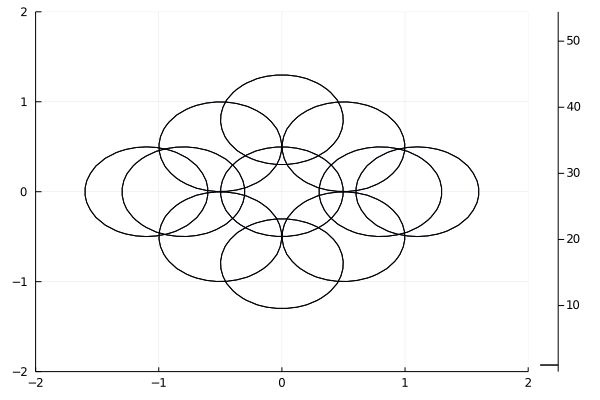

In [5]:
p = range(-2.0,2.0,length=50)
q = range(-2.0,2.0,length=50)

x = 0.0
y = 0.0
a = 0.25
b = 0.25
V(p,q) = (1.0 / a) * ((p-x)^2) + (1.0/b) * (q-y)^2
Plots.contour(p,q, (p,q)->V(p,q), levels=[1.0,1.001])

x = 0.0
y = 0.8
a = 0.25
b = 0.25
V(p,q) = (1.0 / a) * ((p-x)^2) + (1.0/b) * (q-y)^2
Plots.contour!(p,q, (p,q)->V(p,q), levels=[1.0,1.001])

x = -0.8
y = 0.0
a = 0.25
b = 0.25
V(p,q) = (1.0 / a) * ((p-x)^2) + (1.0/b) * (q-y)^2
Plots.contour!(p,q, (p,q)->V(p,q), levels=[1.0,1.001])

x = 0.0
y = -0.8
a = 0.25
b = 0.25
V(p,q) = (1.0 / a) * ((p-x)^2) + (1.0/b) * (q-y)^2
Plots.contour!(p,q, (p,q)->V(p,q), levels=[1.0,1.001])

x = 0.8
y = 0.0
a = 0.25
b = 0.25
V(p,q) = (1.0 / a) * ((p-x)^2) + (1.0/b) * (q-y)^2
Plots.contour!(p,q, (p,q)->V(p,q), levels=[1.0,1.001])

x = -0.5
y = 0.5
a = 0.25
b = 0.25
V(p,q) = (1.0 / a) * ((p-x)^2) + (1.0/b) * (q-y)^2
Plots.contour!(p,q, (p,q)->V(p,q), levels=[1.0,1.001])

x = 0.5
y = 0.5
a = 0.25
b = 0.25
V(p,q) = (1.0 / a) * ((p-x)^2) + (1.0/b) * (q-y)^2
Plots.contour!(p,q, (p,q)->V(p,q), levels=[1.0,1.001])

x = 0.5
y = -0.5
a = 0.25
b = 0.25
V(p,q) = (1.0 / a) * ((p-x)^2) + (1.0/b) * (q-y)^2
Plots.contour!(p,q, (p,q)->V(p,q), levels=[1.0,1.001])

x = -0.5
y = -0.5
a = 0.25
b = 0.25
V(p,q) = (1.0 / a) * ((p-x)^2) + (1.0/b) * (q-y)^2
Plots.contour!(p,q, (p,q)->V(p,q), levels=[1.0,1.001])

x = 1.1
y = 0.0
a = 0.25
b = 0.25
V(p,q) = (1.0 / a) * ((p-x)^2) + (1.0/b) * (q-y)^2
Plots.contour!(p,q, (p,q)->V(p,q), levels=[1.0,1.001])

x = -1.1
y = 0.0
a = 0.25
b = 0.25
V(p,q) = (1.0 / a) * ((p-x)^2) + (1.0/b) * (q-y)^2
Plots.contour!(p,q, (p,q)->V(p,q), levels=[1.0,1.001])

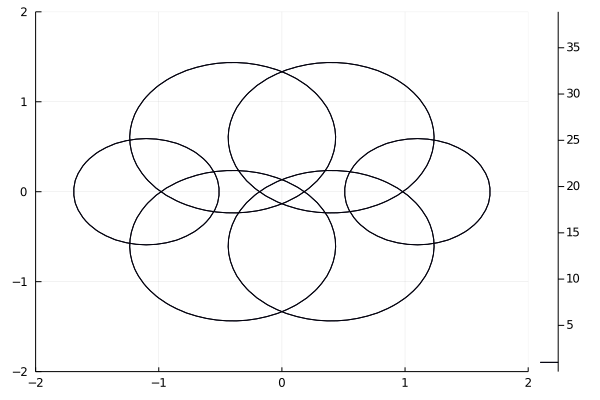

In [28]:
p = range(-2.0,2.0,length=50)
q = range(-2.0,2.0,length=50)

x = 0.4
y = 0.6
a = 0.7
b = 0.7
V(p,q) = (1.0 / a) * ((p-x)^2) + (1.0/b) * (q-y)^2
Plots.contour(p,q, (p,q)->V(p,q), levels=[1.0,1.001])

x = 0.4
y = -0.6
a = 0.7
b = 0.7
V(p,q) = (1.0 / a) * ((p-x)^2) + (1.0/b) * (q-y)^2
Plots.contour!(p,q, (p,q)->V(p,q), levels=[1.0,1.001])

x = -0.4
y = 0.6
a = 0.7
b = 0.7
V(p,q) = (1.0 / a) * ((p-x)^2) + (1.0/b) * (q-y)^2
Plots.contour!(p,q, (p,q)->V(p,q), levels=[1.0,1.001])

x = -0.4
y = -0.6
a = 0.7
b = 0.7
V(p,q) = (1.0 / a) * ((p-x)^2) + (1.0/b) * (q-y)^2
Plots.contour!(p,q, (p,q)->V(p,q), levels=[1.0,1.001])

x = 1.1
y = 0.0
a = 0.35
b = 0.35
V(p,q) = (1.0 / a) * ((p-x)^2) + (1.0/b) * (q-y)^2
Plots.contour!(p,q, (p,q)->V(p,q), levels=[1.0,1.001])

x = -1.1
y = 0.0
a = 0.35
b = 0.35
V(p,q) = (1.0 / a) * ((p-x)^2) + (1.0/b) * (q-y)^2
Plots.contour!(p,q, (p,q)->V(p,q), levels=[1.0,1.001])

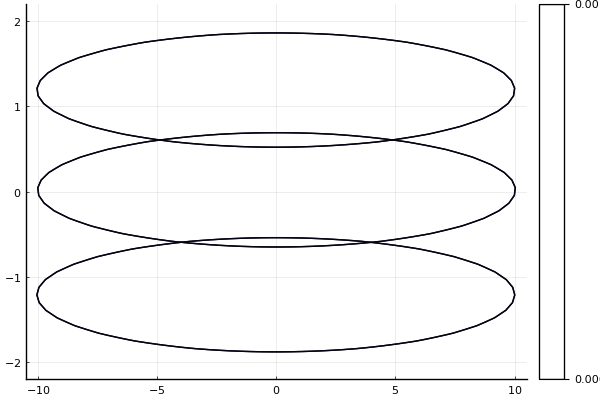

In [9]:
a = 100.5
b = 0.45
p = range(-10.5,10.5,length=50)
q = range(-2.2,2.2,length=50)

x = 0.01
y = 0.02
V(p,q) = (1.0 / a) * ((p-x)^2) + (1.0/b) * (q-y)^2
Plots.contour(p,q, (p,q)->V(p,q), levels=[1.0,1.001])

x = -0.02
y = -1.21
V(p,q) = (1.0 / a) * ((p-x)^2) + (1.0/b) * (q-y)^2
Plots.contour!(p,q, (p,q)->V(p,q), levels=[1.0,1.001])

x = -0.02
y = 1.19
V(p,q) = (1.0 / a) * ((p-x)^2) + (1.0/b) * (q-y)^2
Plots.contour!(p,q, (p,q)->V(p,q), levels=[1.0,1.001])

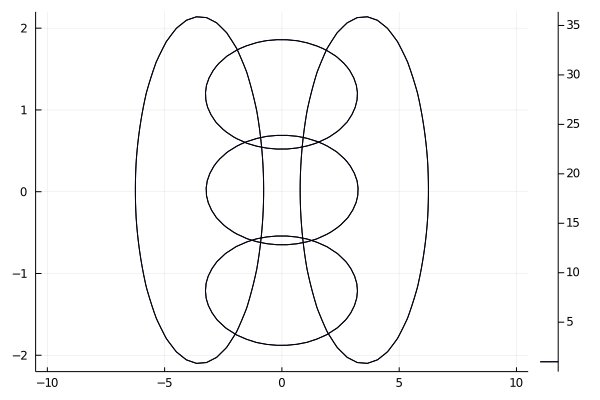

In [15]:
a = 10.5
b = 0.45
p = range(-10.5,10.5,length=50)
q = range(-2.2,2.2,length=50)

x = 0.01
y = 0.02
V(p,q) = (1.0 / a) * ((p-x)^2) + (1.0/b) * (q-y)^2
Plots.contour(p,q, (p,q)->V(p,q), levels=[1.0,1.001])

x = -0.02
y = -1.21
V(p,q) = (1.0 / a) * ((p-x)^2) + (1.0/b) * (q-y)^2
Plots.contour!(p,q, (p,q)->V(p,q), levels=[1.0,1.001])

x = -0.02
y = 1.19
V(p,q) = (1.0 / a) * ((p-x)^2) + (1.0/b) * (q-y)^2
Plots.contour!(p,q, (p,q)->V(p,q), levels=[1.0,1.001])

x = -3.51
y = 0.02
a = 7.5
b = 4.5
V(p,q) = (1.0 / a) * ((p-x)^2) + (1.0/b) * (q-y)^2
Plots.contour!(p,q, (p,q)->V(p,q), levels=[1.0,1.001])

x = 3.51
y = 0.02
a = 7.5
b = 4.5
V(p,q) = (1.0 / a) * ((p-x)^2) + (1.0/b) * (q-y)^2
Plots.contour!(p,q, (p,q)->V(p,q), levels=[1.0,1.001])

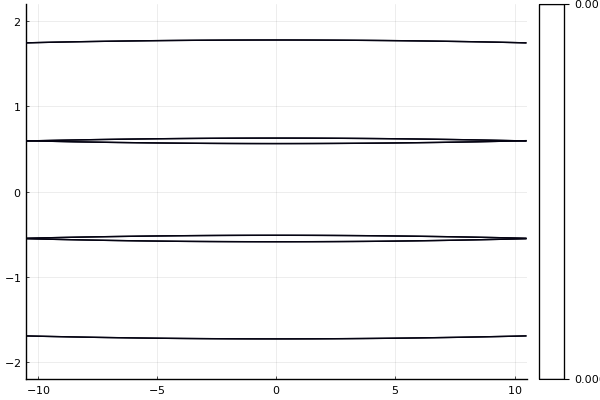

In [26]:
a = 1000.5
b = 0.37
p = range(-10.5,10.5,length=50)
q = range(-2.2,2.2,length=50)

x = 0.01
y = 0.02
V(p,q) = (1.0 / a) * ((p-x)^2) + (1.0/b) * (q-y)^2
Plots.contour(p,q, (p,q)->V(p,q), levels=[1.0,1.001])

x = -0.02
y = -1.12
V(p,q) = (1.0 / a) * ((p-x)^2) + (1.0/b) * (q-y)^2
Plots.contour!(p,q, (p,q)->V(p,q), levels=[1.0,1.001])

x = -0.02
y = 1.17
V(p,q) = (1.0 / a) * ((p-x)^2) + (1.0/b) * (q-y)^2
Plots.contour!(p,q, (p,q)->V(p,q), levels=[1.0,1.001])

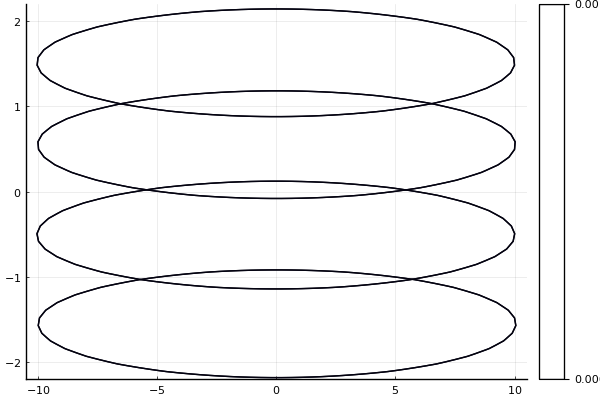

In [16]:
a = 100.5
b = 0.40
p = range(-10.5,10.5,length=50)
q = range(-2.2,2.2,length=50)

x = 0.01
y = 0.55
V(p,q) = (1.0 / a) * ((p-x)^2) + (1.0/b) * (q-y)^2
Plots.contour(p,q, (p,q)->V(p,q), levels=[1.0,1.001])

x = -0.02
y = 1.51
V(p,q) = (1.0 / a) * ((p-x)^2) + (1.0/b) * (q-y)^2
Plots.contour!(p,q, (p,q)->V(p,q), levels=[1.0,1.001])

x = -0.02
y = -0.51
V(p,q) = (1.0 / a) * ((p-x)^2) + (1.0/b) * (q-y)^2
Plots.contour!(p,q, (p,q)->V(p,q), levels=[1.0,1.001])

x = 0.03
y = -1.55
V(p,q) = (1.0 / a) * ((p-x)^2) + (1.0/b) * (q-y)^2
Plots.contour!(p,q, (p,q)->V(p,q), levels=[1.0,1.001])

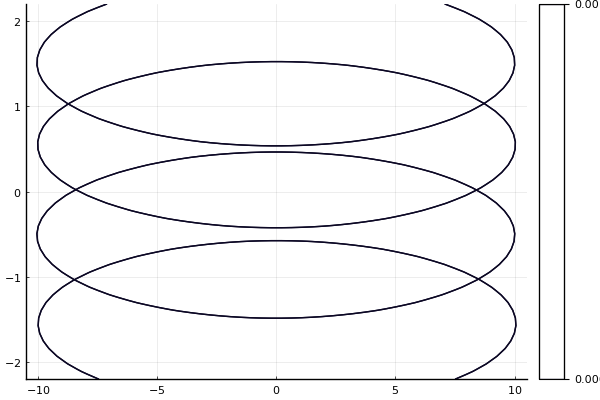

In [31]:
a = 100.5
b = 0.95
p = range(-10.5,10.5,length=50)
q = range(-2.2,2.2,length=50)

x = 0.01
y = 0.55
V(p,q) = (1.0 / a) * ((p-x)^2) + (1.0/b) * (q-y)^2
Plots.contour(p,q, (p,q)->V(p,q), levels=[1.0,1.001])

x = -0.02
y = 1.51
V(p,q) = (1.0 / a) * ((p-x)^2) + (1.0/b) * (q-y)^2
Plots.contour!(p,q, (p,q)->V(p,q), levels=[1.0,1.001])

x = -0.02
y = -0.51
V(p,q) = (1.0 / a) * ((p-x)^2) + (1.0/b) * (q-y)^2
Plots.contour!(p,q, (p,q)->V(p,q), levels=[1.0,1.001])

x = 0.03
y = -1.55
V(p,q) = (1.0 / a) * ((p-x)^2) + (1.0/b) * (q-y)^2
Plots.contour!(p,q, (p,q)->V(p,q), levels=[1.0,1.001])

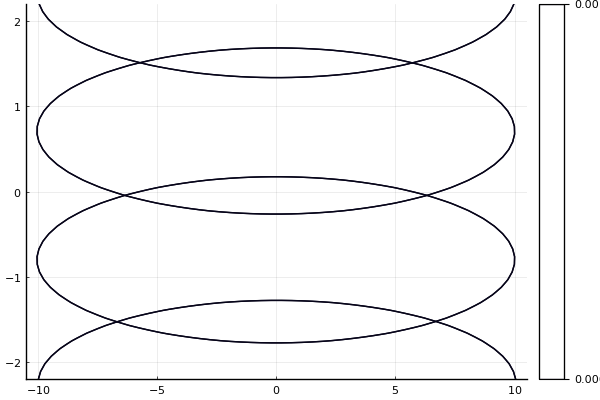

In [35]:
a = 100.5
b = 0.95
p = range(-10.5,10.5,length=50)
q = range(-2.2,2.2,length=50)

x = 0.01
y = 2.31
V(p,q) = (1.0 / a) * ((p-x)^2) + (1.0/b) * (q-y)^2
Plots.contour(p,q, (p,q)->V(p,q), levels=[1.0,1.001])

x = -0.02
y = 0.71
V(p,q) = (1.0 / a) * ((p-x)^2) + (1.0/b) * (q-y)^2
Plots.contour!(p,q, (p,q)->V(p,q), levels=[1.0,1.001])

x = -0.02
y = -0.80
V(p,q) = (1.0 / a) * ((p-x)^2) + (1.0/b) * (q-y)^2
Plots.contour!(p,q, (p,q)->V(p,q), levels=[1.0,1.001])

x = 0.03
y = -2.25
V(p,q) = (1.0 / a) * ((p-x)^2) + (1.0/b) * (q-y)^2
Plots.contour!(p,q, (p,q)->V(p,q), levels=[1.0,1.001])

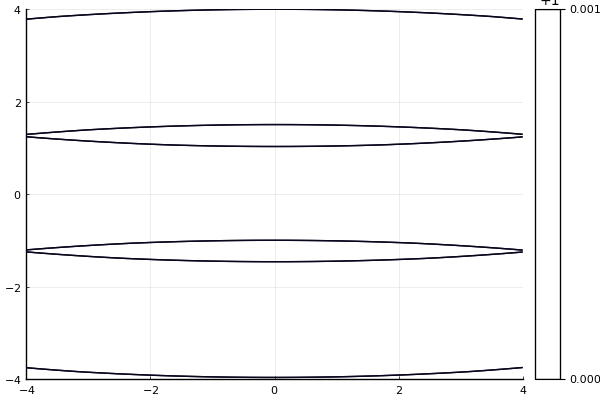

In [12]:
#Plotting for 1 well, 3 strata langevin
pyplot()
x = 0.01
y = 2.51
a = 60.5
b = 2.2
V(p,q) = (1.0 / a) * ((p-x)^2) + (1.0/b) * (q-y)^2
p = range(-4.0,4.0,length=50)
q = range(-4.0,4.0,length=50)
Plots.contour(p,q, (p,q)->V(p,q), levels=[1.0,1.001])

#Plotting for 1 well, 3 strata langevin
pyplot()
x = 0.01
y = 0.02
a = 60.5
b = 2.2
V(p,q) = (1.0 / a) * ((p-x)^2) + (1.0/b) * (q-y)^2
p = range(-4.0,4.0,length=50)
q = range(-4.0,4.0,length=50)
Plots.contour!(p,q, (p,q)->V(p,q), levels=[1.0,1.001])

#Plotting for 1 well, 3 strata langevin
pyplot()
x = -0.02
y = -2.48
a = 60.5
b = 2.2
V(p,q) = (1.0 / a) * ((p-x)^2) + (1.0/b) * (q-y)^2
p = range(-4.0,4.0,length=50)
q = range(-4.0,4.0,length=50)
Plots.contour!(p,q, (p,q)->V(p,q), levels=[1.0,1.001])